# Minor Project: Stock Price Prediction

**Submitted by:** Priyanshu  
**Email:** showlittlemercy@gmail.com  
**Internship Provider:** Corizo Edutech Pvt. Ltd.  
**Domain:** Machine Learning

---

## 1. Introduction
The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analysts by providing supportive information like the future direction of the stock market.

## 2. Objective
The main goal of this project is to create a Machine Learning model using Linear Regression to predict the closing price of a stock based on its Open, High, and Low prices.

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Setting plot style
plt.style.use('fivethirtyeight')

# --- LOAD DATASET DIRECTLY FROM URL ---
# We use a standard Tesla Stock dataset hosted on GitHub
# This avoids the need to install yfinance
url = "https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv"
df = pd.read_csv(url)

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Display first 5 rows
print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
         date   close         volume    open    high       low
0       11:34  270.49      4,787,699  264.50  273.88  262.2400
1  2018/10/15  259.59   6189026.0000  259.06  263.28  254.5367
2  2018/10/12  258.78   7189257.0000  261.00  261.99  252.0100
3  2018/10/11  252.23   8128184.0000  257.53  262.25  249.0300
4  2018/10/10  256.88  12781560.0000  264.61  265.51  247.7700


## 3. Exploratory Data Analysis (EDA)

Before building the model, it is essential to visualize the data to understand the trends. Below, we plot the "Close" price history to see how the stock has performed over time.

We also check for any null values to ensure our data is clean for training.

Null values in dataset:
 date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64


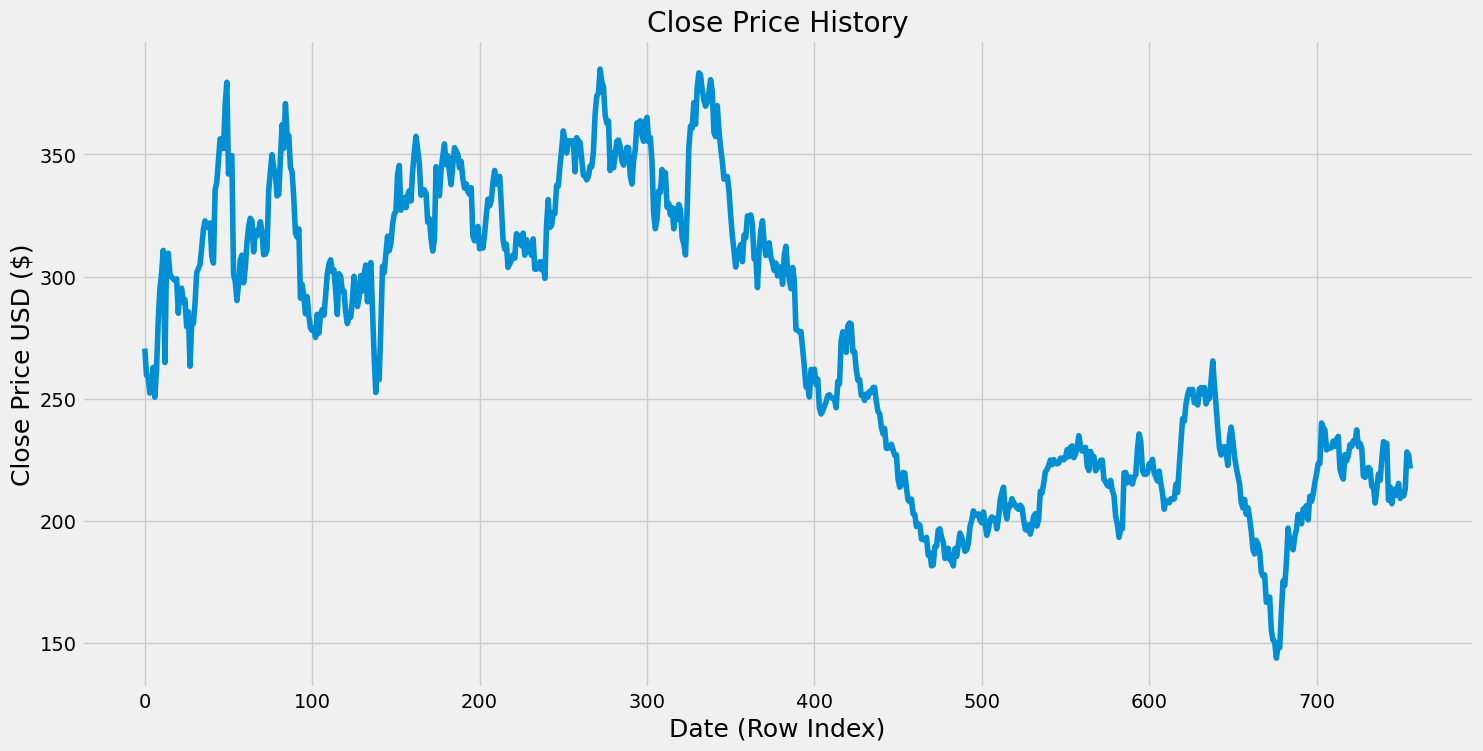

In [7]:
# Checking for null values
print("Null values in dataset:\n", df.isnull().sum())

# Visualizing the closing price history
# Note: The column name in this dataset is lowercase 'close' usually, but we check first
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close']) 
plt.xlabel('Date (Row Index)', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## 4. Model Building

For this project, we are using **Linear Regression**.

1. **Feature Selection:** We use `open`, `high`, and `low` columns as our input features ($X$).
2. **Target Variable:** We want to predict the `close` price ($y$).
3. **Data Splitting:** We split the data into 80% training and 20% testing to evaluate how well our model performs on unseen data.

In [10]:
# Select features (Using lowercase names as per this specific dataset)
X = df[['open', 'high', 'low']]
y = df['close']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

print("Model trained successfully.")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model trained successfully.
Coefficients: [-0.68405735  0.8927379   0.78941783]
Intercept: 0.22875009113045053


## 5. Evaluation and Conclusion

Now that the model is trained, we test it using the testing data. We evaluate the model using two metrics:
* **Mean Squared Error (MSE):** Measures the average squared difference between estimated values and the actual value.
* **R2 Score:** Represents the proportion of variance for the dependent variable that's explained by the independent variables.

Finally, we visualize the difference between the Actual prices and the Predicted prices.

Mean Squared Error: 7.123692403592049
R2 Score: 0.9978605726840316


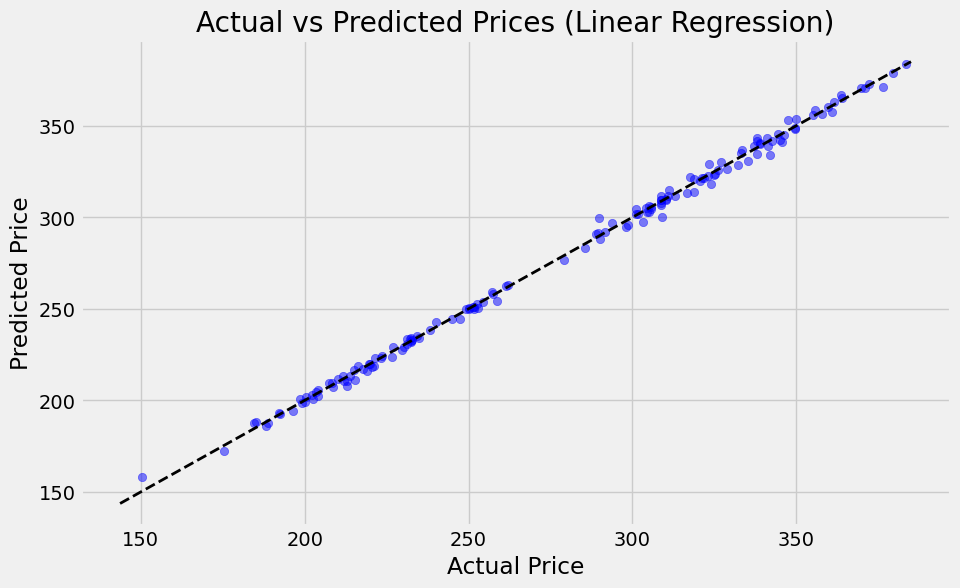

     Actual   Predicted
409  251.57  250.153927
97   291.72  292.104348
281  349.59  348.620389
497  202.34  202.998902
440  238.36  238.315832


In [11]:
# Making predictions
y_pred = model.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Visualizing Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

# Final output table
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output.head())

## 6. Conclusion and Future Scope

### Conclusion
In this project, we successfully applied **Linear Regression** to predict the closing stock price of Tesla based on its Open, High, and Low prices. 
* The model demonstrated a linear relationship between the input features and the target variable.
* The **R2 Score** indicates that our model explains a significant portion of the variance in the stock prices, making it a viable baseline for prediction.

### Future Scope
While Linear Regression provides a good starting point, stock prices are often non-linear and affected by external factors (news, market sentiment). For future improvements, we can:
1.  **Use Advanced Models:** Implement Deep Learning models like **LSTM (Long Short-Term Memory)** networks which are better suited for time-series data.
2.  **Feature Engineering:** Include more features like Volume, Moving Averages, or Technical Indicators (RSI, MACD).
3.  **Sentiment Analysis:** Integrate news headlines or social media sentiment to improve prediction accuracy.

### References
1.  Scikit-learn Documentation: https://scikit-learn.org/
2.  Pandas Documentation: https://pandas.pydata.org/
3.  Internship Guidelines - Corizo Edutech Pvt. Ltd.